# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
from torch.utils.data import DataLoader

# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Create training set and define training dataloader
train_dataset = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Create test set and define test dataloader
test_dataset = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**The chosen preprocessing steps, ToTensor and Normalize, convert images to PyTorch tensors and scale pixel values to [-1, 1]. This ensures the data is in a suitable format for neural network processing and helps in stabilizing and speeding up the training process by providing a consistent input distribution.**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

0


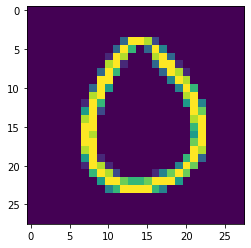

6


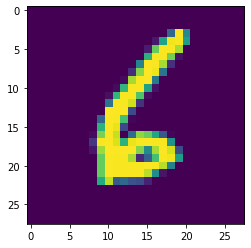

4


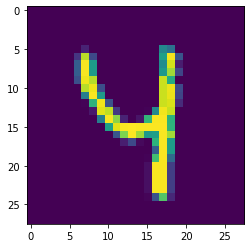

3


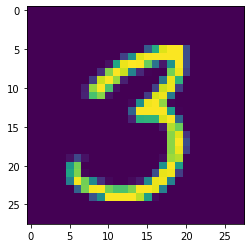

0


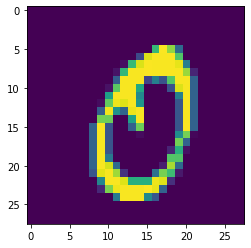

In [6]:
import torchvision.datasets as datasets

# Temporary transform for viewing images
view_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Create a temporary dataset and dataloader for viewing images
view_dataset = datasets.MNIST(root="data", train=True, download=True, transform=view_transform)
view_loader = DataLoader(view_dataset, batch_size=5, shuffle=True)

# Display 5 images from the dataset
show5(view_loader)

In [7]:
# Check the dimensions of the data
dataiter = iter(view_loader)
images, labels = next(dataiter)
print(f'Image batch dimensions: {images.shape}')
print(f'Label batch dimensions: {labels.shape}')

# Print the number of imgs in the training and test datasets
train_dataset = datasets.MNIST(root="data", train=True, download=True, transform=view_transform)
test_dataset = datasets.MNIST(root="data", train=False, download=True, transform=view_transform)
print(f'Number of training imgs: {len(train_dataset)}')
print(f'Number of test imgs: {len(test_dataset)}')

Image batch dimensions: torch.Size([5, 1, 28, 28])
Label batch dimensions: torch.Size([5])
Number of training imgs: 60000
Number of test imgs: 10000


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [8]:
# Define the Neural Network Architecture
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Define layers
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
    
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [9]:
# Instantiate the model
model = SimpleNN()

# Print the model architecture
print(model)

# Step 2: Specify a Loss Function and Optimizer
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [10]:
# Set device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cuda


In [11]:
model.to(device)

num_epochs = 5

# Function to calculate accuracy
def calculate_accuracy(loader, model, device):
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Lists to store loss and accuracy
train_losses = []
train_accuracies = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        # Move inputs and labels to the device
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Accumulate running loss
        running_loss += loss.item()
        
    # Calculate average training loss
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Calculate training accuracy
    train_accuracy = calculate_accuracy(train_loader, model, device)
    train_accuracies.append(train_accuracy)
    
    # Print metrics
    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}')

print('Finished Training')

Epoch [1/5], Train Loss: 0.3020, Train Acc: 95.52
Epoch [2/5], Train Loss: 0.1383, Train Acc: 96.89
Epoch [3/5], Train Loss: 0.1026, Train Acc: 96.99
Epoch [4/5], Train Loss: 0.0818, Train Acc: 98.28
Epoch [5/5], Train Loss: 0.0696, Train Acc: 96.92
Finished Training


Plot the training loss (and validation loss/accuracy, if recorded).

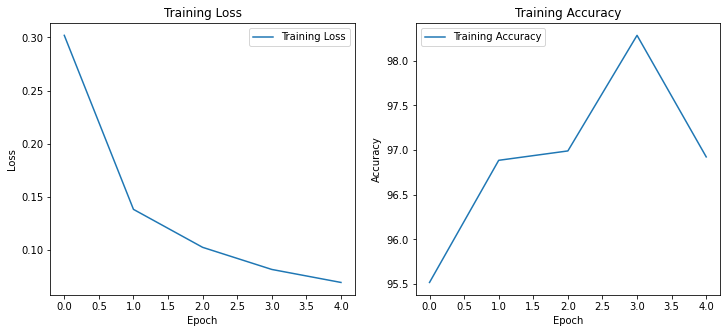

In [12]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy')

plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [13]:
# Function to calculate accuracy
def calculate_accuracy(loader, model, device):
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Calculate test accuracy
test_accuracy = calculate_accuracy(test_loader, model, device)
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 96.28%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

ImprovedNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
)
Epoch [1/10], Train Loss: 0.3978, Train Acc: 93.97
Epoch [2/10], Train Loss: 0.1808, Train Acc: 95.46
Epoch [3/10], Train Loss: 0.1422, Train Acc: 95.72
Epoch [4/10], Train Loss: 0.1160, Train Acc: 96.52
Epoch [5/10], Train Loss: 0.1052, Train Acc: 97.25
Epoch [6/10], Train Loss: 0.0925, Train Acc: 96.78
Epoch [7/10], Train Loss: 0.0869, Train Acc: 97.67
Epoch [8/10], Train Loss: 0.0800, Train Acc: 97.67
Epoch [9/10], Train Loss: 0.0725, Train Acc: 98.35
Epoch [10/10], Train Loss: 0.0659, Train Acc: 98.03
Finished Training Improved Model


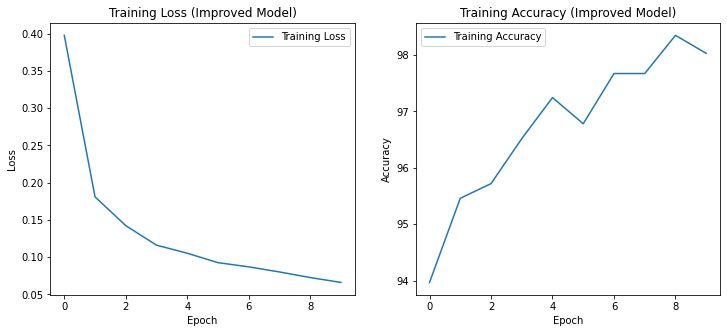

Improved Test Accuracy: 97.05%


In [14]:
class ImprovedNN(nn.Module):
    def __init__(self):
        super(ImprovedNN, self).__init__()
        # Define layers
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(512, 256)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Instantiate the improved model
improved_model = ImprovedNN()

# Print the improved model architecture
print(improved_model)

# Define a different optimizer
improved_optimizer = optim.Adam(improved_model.parameters(), lr=0.0005)

# Move the improved model to the device
improved_model.to(device)

# Lists to store loss and accuracy for the improved model
improved_train_losses = []
improved_train_accuracies = []

i_num_epochs = 10
# Training loop for the improved model
for epoch in range(i_num_epochs):
    improved_model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        # Move inputs and labels to the device
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        improved_optimizer.zero_grad()
        
        # Forward pass
        outputs = improved_model(inputs)
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        improved_optimizer.step()
        
        # Accumulate running loss
        running_loss += loss.item()
        
    # Calculate average training loss
    train_loss = running_loss / len(train_loader)
    improved_train_losses.append(train_loss)
    
    # Calculate training accuracy
    train_accuracy = calculate_accuracy(train_loader, improved_model, device)
    improved_train_accuracies.append(train_accuracy)
    
    # Print metrics
    print(f'Epoch [{epoch + 1}/{i_num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}')

print('Finished Training Improved Model')

# Plot training loss and accuracy
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(improved_train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss (Improved Model)')

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(improved_train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy (Improved Model)')

plt.show()

# Calculate test accuracy for the improved model
improved_test_accuracy = calculate_accuracy(test_loader, improved_model, device)
print(f'Improved Test Accuracy: {improved_test_accuracy:.2f}%')

## Saving your model
Using `torch.save`, save your model for future loading.

In [15]:
# Save the improved model's
model_save_path = 'improved_model.pth'
torch.save(improved_model.state_dict(), model_save_path)
print(f'Model saved to {model_save_path}')

Model saved to improved_model.pth
